<h1 > <span style="font-size: 3em; color:DarkSlateBlue"> </span></h1>

<img src="https://d338t8kmirgyke.cloudfront.net/icons/icon_pngs/000/013/383/original/rank_5659189.png" style=" float:right; max-width:100%; max-height:10%;margin-left:20%"> </img><h1 > <span style="font-size: 2em;">College Ranking System algorithm </span></h1>




<h1 > <span style="font-size: 1em; color:Orange"> 📊 📉 Data science project</span></h1> 

<h4 > <span style="font-size: 1em">Armia Habib<br><br>
</span></h4> 


*** 


<h1 > <span style="font-size: 3em; color:DarkSlateBlue"> </span></h1>

##  About the dataset
> ForbesAmericasTopColleges2019

###  Import Python libraries

In [1]:
# The fundamental package for scientific computing with Python
import numpy as np
from numpy import arange
from numpy import mean

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

# Pandas is a widely-used data analysis and manipulation library for Python
import pandas as pd 

# Seaborn is a data visualization library based on matplotlib
import seaborn as sns


# Missingno is exploratory visualization tool for  missing data
import missingno as msno





# conda install -c conda-forge -c plotly jupyter-dash
#then:
# jupyter lab build
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


# plotly interactive visualization
import plotly.io as pio
import plotly.express as px
pio.templates.default = "plotly_white"


# Scikit-Criteria is a collection of Multiple-criteria decision analysis (MCDA)
# conda install -c conda-forge scikit-criteria
import skcriteria
from skcriteria import DecisionMatrix
from skcriteria.preprocessing import invert_objectives, scalers
from skcriteria.madm import simple



# Show warning messages
import warnings
# Never print matching warnings
warnings.filterwarnings('ignore')

<ipython-input-1-11a776032cd4>:30: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-11a776032cd4>:31: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


###  Import the datasets

In [173]:
# Read a excel file from the same folder into DataFrame
df = pd.read_excel('ForbesAmericasTopColleges2019.xlsx', header = 0)

##  Begin Exploring the Dataset


In [3]:
# Show the first 5 rows of the df_airports
display(df.head())
# Print a concise summary of a DataFrame.
display(df.info())

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2,Stanford University,Stanford,CA,Private,8402,17534,13261.0,50134.0,69109,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3,Yale University,New Haven,CT,Private,6483,12974,18627.0,50897.0,71290,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4,Massachusetts Institute of Technology,Cambridge,MA,Private,4680,11466,20771.0,43248.0,67430,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5,Princeton University,Princeton,NJ,Private,5659,8273,9327.0,48088.0,66150,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      650 non-null    int64  
 1   Name                      650 non-null    object 
 2   City                      647 non-null    object 
 3   State                     650 non-null    object 
 4   Public/Private            650 non-null    object 
 5   Undergraduate Population  650 non-null    int64  
 6   Student Population        650 non-null    int64  
 7   Net Price                 648 non-null    float64
 8   Average Grant Aid         646 non-null    float64
 9   Total Annual Cost         650 non-null    int64  
 10  Alumni Salary             635 non-null    float64
 11  Acceptance Rate           648 non-null    float64
 12  SAT Lower                 551 non-null    float64
 13  SAT Upper                 551 non-null    float64
 14  ACT Lower 

None

# Cleaning and manipulating the data


In [4]:
# Drop all columns that are not need.
df.drop(['Website', 'SAT Lower','SAT Upper','ACT Lower','ACT Upper'], axis=1, inplace=True)

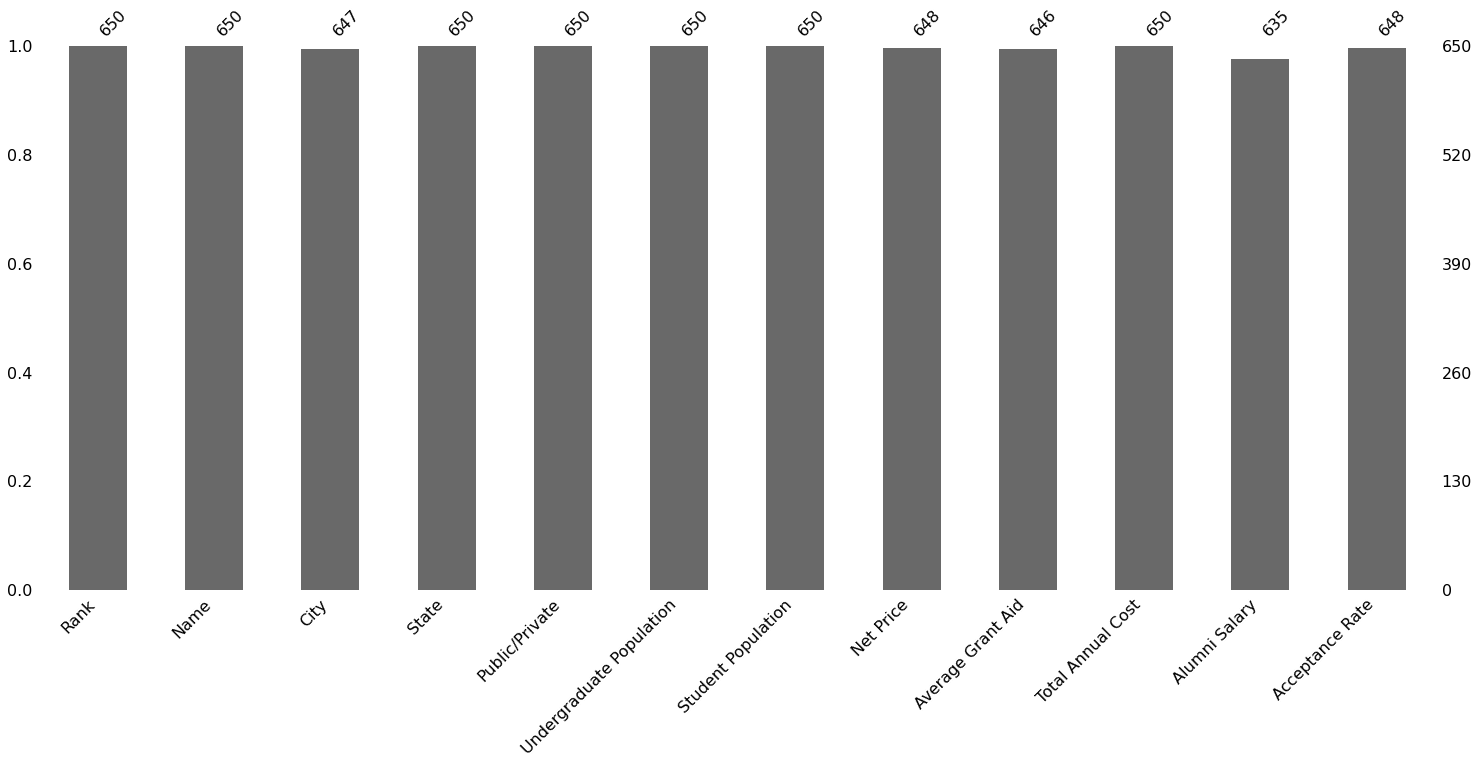

Rank                         0
Name                         0
City                         3
State                        0
Public/Private               0
Undergraduate Population     0
Student Population           0
Net Price                    2
Average Grant Aid            4
Total Annual Cost            0
Alumni Salary               15
Acceptance Rate              2
dtype: int64

In [5]:
# Bar plot of the missing values using missingno library
msno.bar(df)
plt.show()

# Counting missing values
df.isna().sum()

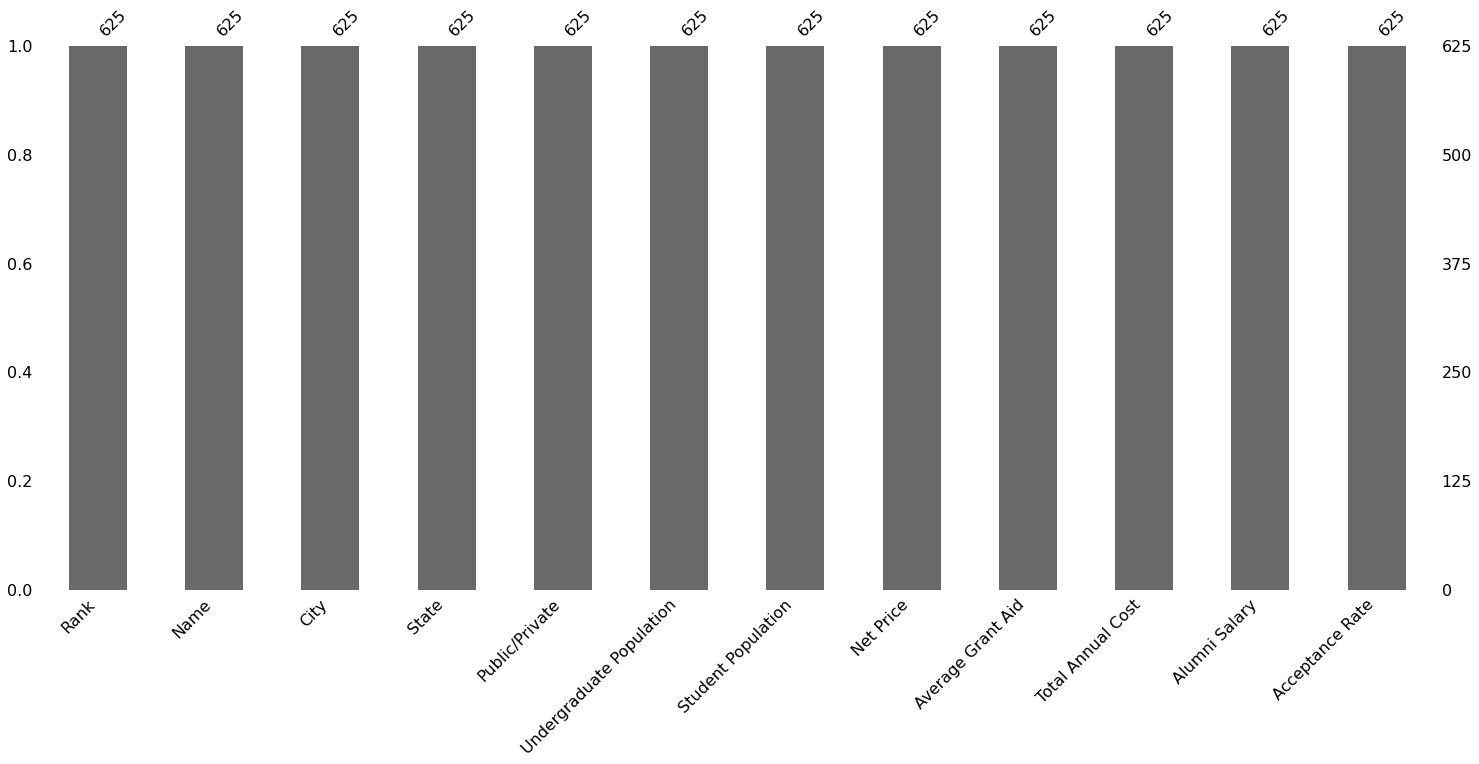

Rank                        0
Name                        0
City                        0
State                       0
Public/Private              0
Undergraduate Population    0
Student Population          0
Net Price                   0
Average Grant Aid           0
Total Annual Cost           0
Alumni Salary               0
Acceptance Rate             0
dtype: int64

In [6]:
# Drop  missing values for now
df = df.dropna()
# Bar plot of the missing values using missingno library
msno.bar(df)
plt.show()

# Counting missing values
df.isna().sum()

# EDA

In [174]:
# summary statistics
df.describe()

,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper
count,650.00000,650.000000,650.000000,648.000000,646.000000,650.000000,635.000000,648.000000,551.000000,551.000000,553.000000,553.000000
mean,325.50000,10002.692308,12022.290769,22336.947531,20031.208978,50330.175385,98851.968504,61.597222,1110.145191,1308.078040,23.278481,28.441230
std,187.78312,11162.172430,13175.091581,8269.912032,11175.869976,13223.055038,14335.249458,22.024781,127.744079,113.553237,3.729318,3.058115
min,1.00000,185.000000,386.000000,0.000000,2975.000000,0.000000,70700.000000,5.000000,820.000000,1060.000000,15.000000,20.000000
25%,163.25000,2020.250000,2240.750000,16410.000000,9288.250000,39917.000000,88600.000000,48.000000,1020.000000,1230.000000,21.000000,26.000000
50%,325.50000,4503.000000,6269.000000,21989.000000,19605.000000,50265.000000,96400.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000
75%,487.75000,15657.000000,17788.000000,27580.500000,27474.500000,60771.750000,105600.000000,78.000000,1180.000000,1380.000000,25.000000,31.000000
max,650.00000,65100.000000,75044.000000,47270.000000,50897.000000,75735.000000,158200.000000,100.000000,1530.000000,1590.000000,34.000000,35.000000


In [8]:
# Show The Max of Alumni Salary observation/row
df.sort_values(by='Alumni Salary', ascending=False).reset_index(drop=True).head(1)

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate
0,23,Harvey Mudd College,Claremont,CA,Private,847,861,34464.0,33782.0,74428,158200.0,15.0


In [9]:
# Show The Min of Acceptance Rate observation/row
df.sort_values(by='Acceptance Rate', ascending=True).reset_index(drop=True).head(1)

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate
0,1,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,146800.0,5.0


In [10]:
# Show The Max of Total Annual Cost observation/row
df.sort_values(by='Total Annual Cost', ascending=False).reset_index(drop=True).head(1)

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate
0,16,University of Chicago,Chicago,IL,Private,6915,16227,25455.0,37883.0,75735,114200.0,9.0


# Show the relationship between all of the numeric variables

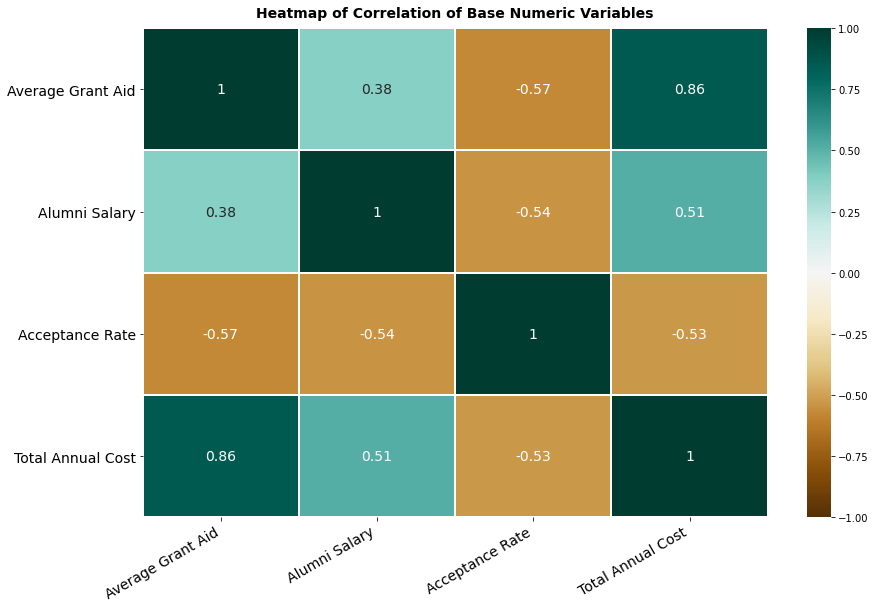

In [11]:
df_numerical = df[['Average Grant Aid','Alumni Salary','Acceptance Rate','Total Annual Cost']]

# Create and show correlation matrix with heatmap among core variables
plt.figure(figsize=(14,9))

sns.heatmap(df_numerical.astype(float).corr(), linewidths=2, vmax=1.0, vmin=-1.0, annot_kws={"fontsize":14},
            cmap='BrBG', linecolor='white', annot=True)

plt.xticks(rotation=30, ha='right', fontsize='14')
plt.yticks( rotation=0, fontsize='14')

plt.title('Heatmap of Correlation of Base Numeric Variables', fontweight='bold', 
          fontsize='14', ha='center', y=1.01)

plt.show()

# Implementation Using skcriteria

In [94]:
# Choose the metrics columns and set the college name as an index. 
df2 = (df[['Name','Average Grant Aid','Alumni Salary','Acceptance Rate','Total Annual Cost']])\
        .set_index(['Name'])
df2.head()

,Average Grant Aid,Alumni Salary,Acceptance Rate,Total Annual Cost
Name,,,,
Harvard University,49870.0,146800.0,5.0,69600
Stanford University,50134.0,145200.0,5.0,69109
Yale University,50897.0,138300.0,7.0,71290
Massachusetts Institute of Technology,43248.0,155200.0,7.0,67430
Princeton University,48088.0,139400.0,6.0,66150



### My algorithm idea is to look for the following:
* High coverage from Grand Aid,
* High  Alumni Salary (A good college is a college that pays you back)
* Low Acceptance Rate:  Colleges with low acceptance rates are generally viewed as desirable and highly sought-after, meaning (theoretically) they accept only top students.
* High Total Annual Cost: The more the cost, the better the learning Quality

In [95]:
# Direction of goodness for each column
objectives = [max, max, min,max]
objectives

[<function max>, <function max>, <function min>, <function max>]

In [96]:
# Covert Datafram to array so we can feed it to SK DecisionMatrix on the next step
df3=df2.values
df3

array([[4.9870e+04, 1.4680e+05, 5.0000e+00, 6.9600e+04],
       [5.0134e+04, 1.4520e+05, 5.0000e+00, 6.9109e+04],
       [5.0897e+04, 1.3830e+05, 7.0000e+00, 7.1290e+04],
       ...,
       [9.2970e+03, 8.5600e+04, 8.5000e+01, 3.2938e+04],
       [2.7155e+04, 7.0700e+04, 7.2000e+01, 4.8100e+04],
       [2.3662e+04, 7.8100e+04, 4.2000e+01, 4.4921e+04]])

In [97]:
# Set up skcriteria and build the DecisionMatrix 
dm = skcriteria.mkdm(df3,
                     objectives,
                     # Change the generic names of the alternatives to College Names
                     alternatives=df['Name'].to_list(),
                     # Add the metrics columns names
                     criteria=list(df2.columns),
                     # Add weights (metrics importance)
                    weights=[0.4, 0.6, 0.55,.5])
dm

,Average Grant Aid[▲ 0.40],Alumni Salary[▲ 0.60],Acceptance Rate[▼ 0.55],Total Annual Cost[▲ 0.50]
Harvard University,49870.0,146800.0,5.0,69600.0
Stanford University,50134.0,145200.0,5.0,69109.0
Yale University,50897.0,138300.0,7.0,71290.0
Massachusetts Institute of Technology,43248.0,155200.0,7.0,67430.0
Princeton University,48088.0,139400.0,6.0,66150.0
...,...,...,...,...
Morehouse College,17318.0,98700.0,74.0,48723.0
New Mexico State University,9582.0,96700.0,64.0,34720.0
Indiana State University,9297.0,85600.0,85.0,32938.0
Emory &amp; Henry College,27155.0,70700.0,72.0,48100.0


In [98]:
# Metrics weights and objectives barplot
fig =px.bar(data_frame=dm.weights,
            orientation="h",
            color=dm.objectives,
           text=dm.weights.index+" "+dm.weights.astype(str)+"  ")

fig.update_layout(yaxis={'categoryorder':'total ascending'},
                  uniformtext_minsize=20,
                  uniformtext_mode='hide',
                 title_text = 'Metrics weights and objectives' )
#y axis    
fig.update_yaxes(visible=False)
fig.update_xaxes(title="Weights")

fig.update_traces(textfont_color='white')

fig.update_layout(
    legend=dict(title="Objective")
    )


In [99]:
# Reverse the maximization criteria for metrics that have (min) as an objective

inverter = invert_objectives.InvertMinimize()
dmt = inverter.transform(dm)
dmt

,Average Grant Aid[▲ 0.40],Alumni Salary[▲ 0.60],Acceptance Rate[▲ 0.55],Total Annual Cost[▲ 0.50]
Harvard University,49870.0,146800.0,0.200000,69600.0
Stanford University,50134.0,145200.0,0.200000,69109.0
Yale University,50897.0,138300.0,0.142857,71290.0
Massachusetts Institute of Technology,43248.0,155200.0,0.142857,67430.0
Princeton University,48088.0,139400.0,0.166667,66150.0
...,...,...,...,...
Morehouse College,17318.0,98700.0,0.013514,48723.0
New Mexico State University,9582.0,96700.0,0.015625,34720.0
Indiana State University,9297.0,85600.0,0.011765,32938.0
Emory &amp; Henry College,27155.0,70700.0,0.013889,48100.0


In [100]:
# Scale the values between  (0,1) using the SumScaler
scaler = scalers.SumScaler(target="both")
dmt = scaler.transform(dmt)
dmt

,Average Grant Aid[▲ 0.195122],Alumni Salary[▲ 0.292683],Acceptance Rate[▲ 0.268293],Total Annual Cost[▲ 0.243902]
Harvard University,0.003993,0.002380,0.014430,0.002198
Stanford University,0.004015,0.002354,0.014430,0.002183
Yale University,0.004076,0.002243,0.010307,0.002252
Massachusetts Institute of Technology,0.003463,0.002517,0.010307,0.002130
Princeton University,0.003851,0.002260,0.012025,0.002089
...,...,...,...,...
Morehouse College,0.001387,0.001600,0.000975,0.001539
New Mexico State University,0.000767,0.001568,0.001127,0.001097
Indiana State University,0.000744,0.001388,0.000849,0.001040
Emory &amp; Henry College,0.002174,0.001146,0.001002,0.001519


In [147]:
# Metrics weights distribution

fig = px.histogram(dmt.matrix, marginal="rug")
fig.update_layout(barmode='overlay',
                  title_text = 'Metrics weights distribution',
                  legend=dict(
                      yanchor="bottom",
                      y=0.4,
                      xanchor="right",
                      x=0.9))
fig.update_traces(opacity=0.75)
fig.update_yaxes(visible=False)



fig.show()

In [158]:
# Rank our  data by Weighted Sum Model
dec = simple.WeightedSumModel()
# We use the tansformed version of the data
rank = dec.evaluate(dmt)  
rank

Alternatives,Harvard University,Stanford University,Yale University,Massachusetts Institute of Technology,Princeton University,University of Pennsylvania,Brown University,California Institute of Technology,Duke University,Dartmouth College,Cornell University,Pomona College,"University of California, Berkeley",Columbia University,Georgetown University,University of Chicago,Northwestern University,University of Notre Dame,Williams College,"University of Michigan, Ann Arbor",Rice University,Johns Hopkins University,Harvey Mudd College,Swarthmore College,Bowdoin College,Vanderbilt University,Amherst College,Claremont McKenna College,University of Southern California,Washington University in St. Louis,University of Virginia,Tufts University,New York University,Middlebury College,Carnegie Mellon University,"University of California, Los Angeles",Bates College,Wesleyan University,Boston College,Washington and Lee University,Wellesley College,"University of North Carolina, Chapel Hill",Colgate University,College of William & Mary,Davidson College,Haverford College,Barnard College,Santa Clara University,Carleton College,Pitzer College,Emory University,Wake Forest University,Lafayette College,Cooper Union,Hamilton College,Scripps College,Vassar College,Babson College,"University of Maryland, College Park","University of Washington, Seattle",Georgia Institute of Technology,United States Merchant Marine Academy,Lehigh University,"University of Illinois, Urbana-Champaign","University of Wisconsin, Madison",University of Florida,Kenyon College,Villanova University,Bucknell University,Boston University,Colby College,"University of Texas, Austin",College of the Holy Cross,George Washington University,"University of California, San Diego",Grinnell College,Smith College,University of Rochester,University of Richmond,"University of California, Santa Barbara",Oberlin College,Macalester College,"University of California, Irvine","University of California, Davis",Whitman College,University of Miami (FL),Southern Methodist University,Colorado College,Worcester Polytechnic Institute,Colorado School of Mines,Brigham Young University,Brandeis University,Yeshiva University,"University of Minnesota, Twin Cities",University of Georgia,Case Western Reserve University,Skidmore College,Occidental College,"Texas A&M University, College Station",Union College (NY),Reed College,Tulane University,Bentley University,Virginia Tech,Trinity College (CT),Rose-Hulman Institute of Technology,Bryn Mawr College,Rhode Island School of Design,Rensselaer Polytechnic Institute,Franklin and Marshall College,"California Polytechnic State University, San Luis Obispo",St. Olaf College,Pennsylvania State University,Purdue University,The Juilliard School,Dickinson College,Ohio State University,Wheaton College (IL),Rutgers University,Loyola Marymount University,University of Portland,American University,Furman University,Connecticut College,Pepperdine University,University of Connecticut,"Indiana University, Bloomington",DePauw University,Elon University,Clemson University,Fairfield University,James Madison University,Mount Holyoke College,Gettysburg College,"North Carolina State University, Raleigh",University of Denver,Fordham University,University of San Diego,Trinity University (TX),University of Pittsburgh,"Binghamton University, SUNY","University of Colorado, Boulder",University of Delaware,Texas Christian University,College of New Jersey,Rhodes College,Florida State University,Stevens Institute of Technology,Denison University,Sewanee‚ÄîUniversity of the South,"University of Massachusetts, Amherst",Syracuse University,Sarah Lawrence College,St. Lawrence University,Michigan State University,University of Iowa,Saint Louis University,Seattle University,Kalamazoo College,University of Dayton,Auburn University,Saint Joseph's University (PA),University of Vermont,Samford University,Gonzaga University,Wofford College,Providence College,University of Puget Sound,"CUNY, Baruch Colleg

In [159]:
type(rank.rank_) # Ranking values

numpy.ndarray

In [160]:
type(rank.alternatives) # Names

numpy.ndarray

In [161]:
# Transpose the Data and Create a Dataframe from the two arrays

d = {'Name':rank.alternatives,'Rank':rank.rank_}
rank_df = pd.DataFrame(data=d)
rank_df.head(10)

,Name,Rank
0,Harvard University,1
1,Stanford University,2
2,Yale University,4
3,Massachusetts Institute of Technology,6
4,Princeton University,3
5,University of Pennsylvania,11
6,Brown University,10
7,California Institute of Technology,8
8,Duke University,14
9,Dartmouth College,15


In [162]:
# Merge two data frames based on particular Name column

df_merged= pd.merge(df, rank_df, on='Name')

# Drop all columns that are not need.
df_merged.drop(['Rank_x'], axis=1, inplace=True)

# Sort by the new rank column then rest index to match
df_merged = df_merged.sort_values(by='Rank_y', ascending=True)

# Show the first 5 rows of the df_airports
display(df_merged.head())

# Print a concise summary of a DataFrame.
display(df_merged.info())

,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,Rank_y
0,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,146800.0,5.0,1
1,Stanford University,Stanford,CA,Private,8402,17534,13261.0,50134.0,69109,145200.0,5.0,2
4,Princeton University,Princeton,NJ,Private,5659,8273,9327.0,48088.0,66150,139400.0,6.0,3
2,Yale University,New Haven,CT,Private,6483,12974,18627.0,50897.0,71290,138300.0,7.0,4
13,Columbia University,New York,NY,Private,8523,30454,24231.0,49185.0,74199,126800.0,7.0,5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 401
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      625 non-null    object 
 1   City                      625 non-null    object 
 2   State                     625 non-null    object 
 3   Public/Private            625 non-null    object 
 4   Undergraduate Population  625 non-null    int64  
 5   Student Population        625 non-null    int64  
 6   Net Price                 625 non-null    float64
 7   Average Grant Aid         625 non-null    float64
 8   Total Annual Cost         625 non-null    int64  
 9   Alumni Salary             625 non-null    float64
 10  Acceptance Rate           625 non-null    float64
 11  Rank_y                    625 non-null    int32  
dtypes: float64(4), int32(1), int64(3), object(4)
memory usage: 61.0+ KB


None

In [163]:
df_merged.reset_index(inplace=True)
df_merged = df_merged.rename(columns = {'index':'Forbes_Rank'})
df_merged.head()

,Forbes_Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,Rank_y
0,0,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,146800.0,5.0,1
1,1,Stanford University,Stanford,CA,Private,8402,17534,13261.0,50134.0,69109,145200.0,5.0,2
2,4,Princeton University,Princeton,NJ,Private,5659,8273,9327.0,48088.0,66150,139400.0,6.0,3
3,2,Yale University,New Haven,CT,Private,6483,12974,18627.0,50897.0,71290,138300.0,7.0,4
4,13,Columbia University,New York,NY,Private,8523,30454,24231.0,49185.0,74199,126800.0,7.0,5


In [164]:
# compare between old and new ranks 

# Create a scatterplot
fig = px.scatter(df_merged,
                 x='Rank_y',
                 y='Forbes_Rank',
                 trendline="ols",
                trendline_scope="overall",
                opacity=0.5)


fig.update_layout(# Add title
                 title_text = 'Forbes_Rank Vs. Our Rank',
                 title_x=0.5,
    legend=dict(
        yanchor="top",
        y=1.05,
        xanchor="center",
        x=0.5))





# Show your work
fig.show()

In [165]:
# Reverse Ranking column for visualizations
df_merged['Rank_reversed']= len(df_merged)-df_merged['Rank_y']
df_merged.head()

,Forbes_Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,Rank_y,Rank_reversed
0,0,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,146800.0,5.0,1,624
1,1,Stanford University,Stanford,CA,Private,8402,17534,13261.0,50134.0,69109,145200.0,5.0,2,623
2,4,Princeton University,Princeton,NJ,Private,5659,8273,9327.0,48088.0,66150,139400.0,6.0,3,622
3,2,Yale University,New Haven,CT,Private,6483,12974,18627.0,50897.0,71290,138300.0,7.0,4,621
4,13,Columbia University,New York,NY,Private,8523,30454,24231.0,49185.0,74199,126800.0,7.0,5,620


# Show TN Ranking

In [189]:
# Fillter Data to TN state 
df_Tn=df_merged.query("State=='TN'")

# Create the bar chart
fig = px.bar(
             # Set the data
             df_Tn,
             # Set the orientation to horizontal
             orientation="h",
             # Set the variable for the y-axis
             y="Name",
             # Set the variable for the x-axis
             x="Rank_reversed",
             width=800, height=700,
             # To show total on Hover text
            text=df_Tn['Rank_y'],
            # Set the color variable and map
             color="Public/Private",
            )

fig.update_traces(hovertemplate='<b>%{y}'+ '<br>Rank: %{text}', textfont_color='white')
# Update the figure layout
fig.update_layout(yaxis={'categoryorder':'total ascending'},uniformtext_minsize=20,
                 # Add title
                 title_text = 'Colleges Rank',
                 title_x=0.5)

# Show the plot
fig.show()

# Dashboard web aplication using Dash and Plotly

In [190]:
# Create the Dash app
app = JupyterDash(__name__)

app.layout = html.Div([
  html.H1('Colleges Ranking'),
  html.Div(
    children=[
    html.Div(
        children=[
        html.H2('State'),
        html.Br(),
        html.H3('Select State'),
        # Add a dropdown with identifier
        dcc.Dropdown(id='country_dd',
        # Set the available options with noted labels and values
        options=[{'label': i, 'value': i} for i in df_merged.State.unique()],
                     style={'width':'200px', 'margin':'0 auto'})],
        style={'width':'350px', 'height':'350px', 'display':'inline-block', 'vertical-align':'top', 'border':'1px solid black', 'padding':'20px'}),
    
        html.Div(children=[
            # Add a graph component with identifier
            dcc.Graph(id='major_cat'),],style={'width':'700px','display':'inline-block'}),])], style={'text-align':'center', 'display':'inline-block', 'width':'100%'})


@app.callback(
    # Set the input and output of the callback to link the dropdown to the graph
    Output(component_id='major_cat', component_property='figure'),
    Input(component_id='country_dd', component_property='value')
)


def update_plot(input_state):
    country_filter = 'All Countries'
    df_new = df_merged.copy(deep=True)
    if input_state:
        country_filter = input_state
        df_new = df_new[df_new['State'] == country_filter]
    ecom_bar_major_cat = df_new
    bar_fig_major_cat = fig = px.bar(ecom_bar_major_cat,orientation="h",y="Name",x="Rank_reversed", width=800, height=1500,color="Public/Private",text=ecom_bar_major_cat['Rank_y'])
    # Update the figure layout
    bar_fig_major_cat.update_layout(yaxis={'categoryorder':'total ascending'},
                                    title_text = 'Colleges Rank',title_x=0.5,
                                   uniformtext_minsize=20)
    bar_fig_major_cat.update_traces(textfont_color='white')
    return bar_fig_major_cat

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Dash app running on http://127.0.0.1:8050/
